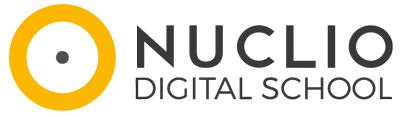

## **Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis.


### 1) Import libraries

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
import os

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Manejo de advertencias
import warnings
warnings.filterwarnings('ignore')

# funciones
import importlib
import functions as fns
importlib.reload(fns)

# Filtro de paises
import pycountry
import country_converter as coco

# Configuraciones de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2) Paths & directories

In [2]:
# Rutas de los archivos de datos
data_folder = 'data_who/'

# Rutas de los archivos de csv
annual_number_of_deaths_by_cause_path = data_folder + 'annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + 'death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + 'gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + 'global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + 'homicide_rate_unodc.csv'
life_expectancy_path = data_folder + 'life_expectancy.csv'
poverty_explorer_path = data_folder + 'poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + 'public_healthcare_spending_share_gdp.csv'


In [3]:
# 1. Define la ruta donde están los ficheros
path = r'C:\Users\titoa\OneDrive\Documents\Nuclio\Proyecto Final\data_who'

# 2. Lista todos los archivos del directorio
lista = os.listdir(path)

# Crear lista con los archivos .csv o .xlsx
csv_files = [file for file in lista if file.endswith(('.csv', '.xlsx'))]

dict_data = {}

for file in csv_files:
    ruta = os.path.join(path, file)
    df = fns.leer_archivo(ruta)
    dict_data[file] = df
    print(f"{file}: {df.shape}")  # ejemplo: mostrar nombre y dimensiones

annual_number_of_deaths_by_cause.csv: (6840, 34)
death_rate_from_suicides_gho.csv: (3880, 4)
gdp_per_capita_penn_world_table.csv: (10108, 4)
global_vaccination_coverage.csv: (7897, 14)
homicide_rate_unodc.csv: (4204, 4)
life_expectancy.csv: (20755, 4)
poverty_explorer.csv: (2602, 109)
public_healthcare_spending_share_gdp.csv: (4014, 4)


## 1. Analisis de Datos

### 1.1. Revision Inicial del conjunto de datos

In [ ]:
for key, value in dict_data.items():
    print(key)
    fns.exploracion_inicial(value)

#### 1.2. Evaluar la posibilidad de complementar los datos disponibles con datos publicos de distintas fuentes relativos a otros factores de interes

Ya que mi variable principal es la esperanza de vida, debo asociar que combinacion de factores ayudan a que un pais tenga una mayor esperanza de vida.

Por conocimiento general uno podria decir que los paises que tienen una alta esperanza de vida son:

    -   aquellos que se vacunan a temprana edad, (top 10 de vacunas que mas prolongan la esperanza de vida)
    -   aquellos que tienen un rate de homicidio bajo
    -   aquellos que tienen un rate de suicidios bajo
    -   aquellos que invierten mas su gdp en el sistema de salud
    -   aquellos que tienen mayor gdp_per_capita
    -   aquellos cuyo numero anual de muertes no incluye ciertas enfermedades (top 10 enfermedades mas letales)

- Se puede hacer webscrapping de los criterios seleccionados para mapear datos mas recientes (pag de Our World in Data)
- Que otros factores me pueden interesar?



In [4]:
[k for k in dict_data.keys()]

['annual_number_of_deaths_by_cause.csv',
 'death_rate_from_suicides_gho.csv',
 'gdp_per_capita_penn_world_table.csv',
 'global_vaccination_coverage.csv',
 'homicide_rate_unodc.csv',
 'life_expectancy.csv',
 'poverty_explorer.csv',
 'public_healthcare_spending_share_gdp.csv']

#### Agrego una columna llamada Country, para comparar con el resto de tablas, sera una copia de Entity

In [4]:
df_life_expectancy = dict_data['life_expectancy.csv']
df_life_expectancy['Country'] = df_life_expectancy['Entity']

df_annual_deaths = dict_data['annual_number_of_deaths_by_cause.csv']
df_annual_deaths['Country'] = df_annual_deaths['Entity']

df_death_suicides = dict_data['death_rate_from_suicides_gho.csv']
df_death_suicides['Country'] = df_death_suicides['Entity']

df_gdp_per_capita = dict_data['gdp_per_capita_penn_world_table.csv']
df_gdp_per_capita['Country'] = df_gdp_per_capita['Entity']

df_global_vaccination_coverage = dict_data['global_vaccination_coverage.csv']
df_global_vaccination_coverage['Country'] = df_global_vaccination_coverage['Entity']

df_death_homicide = dict_data['homicide_rate_unodc.csv']
df_death_homicide['Country'] = df_death_homicide['Entity']

df_public_health_gdp_spending = dict_data['public_healthcare_spending_share_gdp.csv']
df_public_health_gdp_spending['Country'] = df_public_health_gdp_spending['Entity']

df_poverty = dict_data['poverty_explorer.csv']

df_dict_inicial = {
    "life_expectancy": df_life_expectancy,
    "annual_deaths": df_annual_deaths,
    "death_suicides": df_death_suicides,
    "gdp_per_capita": df_gdp_per_capita,
    "global_vaccination_coverage": df_global_vaccination_coverage,
    "death_homicide": df_death_homicide,
    "public_health_gdp_spending": df_public_health_gdp_spending,
    "poverty": df_poverty
}

In [5]:
# Ordenar el DataFrame de esperanza de vida por año y esperanza de vida al nacer
df_life_sorted = df_life_expectancy.sort_values(by=["Year", "Period life expectancy at birth - Sex: all - Age: 0"], ascending=[True, True]).reset_index(drop=True)
df_life_sorted.head(10)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Country
0,United Kingdom,GBR,1543,33.94,United Kingdom
1,United Kingdom,GBR,1548,38.82,United Kingdom
2,United Kingdom,GBR,1553,39.59,United Kingdom
3,United Kingdom,GBR,1558,22.38,United Kingdom
4,United Kingdom,GBR,1563,36.66,United Kingdom
5,United Kingdom,GBR,1568,39.67,United Kingdom
6,United Kingdom,GBR,1573,41.06,United Kingdom
7,United Kingdom,GBR,1578,41.56,United Kingdom
8,United Kingdom,GBR,1583,42.70,United Kingdom
9,United Kingdom,GBR,1588,37.05,United Kingdom


In [6]:
# Filtrar los datos de esperanza de vida desde 1990 en adelante y ordenarlos por año y esperanza de vida al nacer en orden descendente
df_life_expectancy_1990 = (df_life_sorted[df_life_sorted['Year'] >= 1990]
                .sort_values(by=["Year", "Period life expectancy at birth - Sex: all - Age: 0"], ascending=False)
                .reset_index(drop=True))
df_life_expectancy_1990.head(5)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Country
0,Monaco,MCO,2021,85.9463,Monaco
1,Hong Kong,HKG,2021,85.4734,Hong Kong
2,Macao,MAC,2021,85.3994,Macao
3,Japan,JPN,2021,84.7839,Japan
4,Australia,AUS,2021,84.5265,Australia


#### Aca quiero saber que paises tienen registros de life expectancy todos los años desde 1990 - 2021

In [7]:
# Obtener los años únicos en el DataFrame filtrado
total_years = df_life_expectancy_1990["Year"].unique()
total_years

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [15]:
# Obtener el número total de años únicos
total_years_n = df_life_expectancy_1990["Year"].nunique()

# Obtener la lista de países que tienen datos para todos los años desde 1990
all_countries = (
    # Agrupar por país y contar los años únicos
    df_life_expectancy_1990.groupby("Country")["Year"]
    .nunique()
    # Filtrar países con datos en todos los años
    .loc[lambda s: s == total_years_n]
    # Obtener los índices y convertirlos a una lista
    .index
    .tolist()
)

len(all_countries), all_countries

(257,
 ['Afghanistan',
  'Africa',
  'Albania',
  'Algeria',
  'American Samoa',
  'Americas',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Asia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'East Timor',
  'Ecuador',
  'Egypt',


#### Como se observa en la lista de arriba, hay algunos territorios y resumen de paises como "Less developed regions", "Latin America and the Caribbean", "High-income countries". Para este estudio se utilizaran solo paises y no territorios u otros.

#### Filtramos la lista de paises segun la ISO3166 y aplicando la libreria country_convert para obtener solo la lista de paises
https://pypi.org/project/country-converter/ 

https://pypi.org/project/pycountry/


In [19]:
pip install country_converter --upgrade

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pycountry --upgrade

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 50.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
cc = coco.CountryConverter()

# Filtro de paises
s = pd.Series(all_countries).dropna().astype(str).str.strip()
# Remover cadenas vacías
s = s[s != ""]

# Convertir nombres de países a códigos ISO3
iso3 = cc.convert(names=s.tolist(), to="ISO3", not_found=None)

# iso3 puede volver lista; lo llevamos a una Serie
iso3 = pd.Series(iso3, index=s.index)

# ISO3 list of real countries
iso3_countries = {c.alpha_3 for c in pycountry.countries}

paises_reales = s[iso3.isin(iso3_countries)].tolist()
no_paises = s[~iso3.isin(iso3_countries)].tolist()
print(f"Regiones/Territorios: {no_paises}, len: {len(no_paises)}\n Paises Reales: {paises_reales}, len: {len(paises_reales)}")

Africa not found in regex
Americas not found in regex
Asia not found in regex
Europe not found in regex
High-income countries not found in regex
Land-locked Developing Countries (LLDC) not found in regex
Latin America and the Caribbean not found in regex
Least developed countries not found in regex
Less developed regions not found in regex
Less developed regions,  not found in regex
Less developed regions,  not found in regex
Low-income countries not found in regex
Lower-middle-income countries not found in regex
Middle-income countries not found in regex
More developed regions not found in regex
No income group available not found in regex
Northern America not found in regex
Oceania not found in regex
Small Island Developing States (SIDS) not found in regex
Upper-middle-income countries not found in regex
World not found in regex


Regiones/Territorios: ['Africa', 'Americas', 'Asia', 'Europe', 'High-income countries', 'Kosovo', 'Land-locked Developing Countries (LLDC)', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 'Low-income countries', 'Lower-middle-income countries', 'Middle-income countries', 'More developed regions', 'No income group available', 'Northern America', 'Oceania', 'Small Island Developing States (SIDS)', 'Upper-middle-income countries', 'World'], len: 22
 Paises Reales: ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil'

In [14]:
len(paises_reales), paises_reales

(235,
 ['Afghanistan',
  'Albania',
  'Algeria',
  'American Samoa',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'East Timor',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Equatorial Guine

In [19]:
print(len(all_countries) - len(paises_reales))
print(no_paises)

22
['Africa', 'Americas', 'Asia', 'Europe', 'High-income countries', 'Kosovo', 'Land-locked Developing Countries (LLDC)', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 'Low-income countries', 'Lower-middle-income countries', 'Middle-income countries', 'More developed regions', 'No income group available', 'Northern America', 'Oceania', 'Small Island Developing States (SIDS)', 'Upper-middle-income countries', 'World']


In [16]:
lista_original = countries_all_years

cc = coco.CountryConverter()

# Limpieza básica (quita None/NaN y espacios)
s = pd.Series(lista_original).dropna().astype(str).str.strip()
s = s[s != ""]

# Convertir todo de una
iso3 = cc.convert(names=s.tolist(), to="ISO3", not_found=None)

# iso3 puede volver lista; lo llevamos a Series alineada
iso3 = pd.Series(iso3, index=s.index)

paises_reales = s[iso3.notna()].tolist()
no_paises = s[iso3.isna()].tolist()

print(f"Regiones/Territorios (no mapeados): {no_paises}, len: {len(no_paises)}")
print(f"Mapeados a ISO3: {paises_reales}, len: {len(paises_reales)}")

Africa not found in regex
Americas not found in regex
Asia not found in regex
Europe not found in regex
High-income countries not found in regex
Land-locked Developing Countries (LLDC) not found in regex
Latin America and the Caribbean not found in regex
Least developed countries not found in regex
Less developed regions not found in regex
Less developed regions,  not found in regex
Less developed regions,  not found in regex
Low-income countries not found in regex
Lower-middle-income countries not found in regex
Middle-income countries not found in regex
More developed regions not found in regex
No income group available not found in regex
Northern America not found in regex
Oceania not found in regex
Small Island Developing States (SIDS) not found in regex
Upper-middle-income countries not found in regex
World not found in regex


Regiones/Territorios (no mapeados): [], len: 0
Mapeados a ISO3: ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', '

In [15]:
lista_original = countries_all_years

# Inicializar el convertidor
cc = coco.CountryConverter()

# Filtrar solo lo que sea un país
paises_reales = []
no_paises = []
for item in lista_original:
    # Intentamos convertir a código ISO3
    result = cc.convert(names=item, to='ISO3', not_found=None)
    if result is not None:
        paises_reales.append(item)
    else:
        no_paises.append(item)

print(f"Regiones/Territorios: {no_paises}, len: {len(no_paises)}\n Paises Reales: {paises_reales}, len: {len(paises_reales)}")

Africa not found in regex
Americas not found in regex
Asia not found in regex
Europe not found in regex
High-income countries not found in regex
Land-locked Developing Countries (LLDC) not found in regex
Latin America and the Caribbean not found in regex
Least developed countries not found in regex
Less developed regions not found in regex
Less developed regions,  not found in regex
Less developed regions,  not found in regex
Low-income countries not found in regex
Lower-middle-income countries not found in regex
Middle-income countries not found in regex
More developed regions not found in regex
No income group available not found in regex
Northern America not found in regex
Oceania not found in regex
Small Island Developing States (SIDS) not found in regex
Upper-middle-income countries not found in regex
World not found in regex


Regiones/Territorios: [], len: 0
 Paises Reales: ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Eur

Ahora necesito normalizar todos los countries de los datasets siguiendo el codigo de ISO

In [15]:
# Diccionario para guardar los resultados limpios
df_dict_cleaned = {}

# Procesar cada DataFrame en el diccionario
for name, df in df_dict.items():

    # 1. Copiamos el DF para no modificar el original por accidente
    temp_df = df.copy()
    
    # 2. Convertir nombres a ISO3
    # Usamos .convert para obtener el código estándar de 3 letras
    temp_df['ISO_Code'] = cc.convert(names=temp_df['Country'], to='ISO3', not_found=None)
    
    # 3. Filtrar: Solo nos quedamos con los que tienen un código ISO válido
    # Esto elimina automáticamente "World", "Africa", "High Income", etc.
    df_cleaned = temp_df.dropna(subset=['ISO_Code']).copy()
    
    # Guardar en el nuevo diccionario
    df_dict_cleaned[name] = df_cleaned
    
    # Reporte de progreso
    eliminados = len(temp_df) - len(df_cleaned)
    print(f"✅ {name}: Normalizado. Se filtraron {eliminados} filas (regiones/errores).")



Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not f

✅ life_expectancy: Normalizado. Se filtraron 0 filas (regiones/errores).


East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not found in regex
East Asia & Pacific (WB) not fou

✅ annual_deaths: Normalizado. Se filtraron 0 filas (regiones/errores).


Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Eastern Mediterranean not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in rege

✅ death_suicides: Normalizado. Se filtraron 0 filas (regiones/errores).


African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex
African Region (WHO) not found in regex


✅ gdp_per_capita: Normalizado. Se filtraron 0 filas (regiones/errores).


Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region (WHO) not found in regex
Eastern Mediterranean Region

✅ global_vaccination_coverage: Normalizado. Se filtraron 0 filas (regiones/errores).


Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Europe (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (UN) not found in regex
Melanesia (U

✅ death_homicide: Normalizado. Se filtraron 0 filas (regiones/errores).


East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
East Asia and Pacific (WB) not found in regex
Europe and Central Asia (WB) not found in regex
Europe and Central Asia (WB) not

✅ public_health_gdp_spending: Normalizado. Se filtraron 0 filas (regiones/errores).


Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central Asia (PIP) not found in regex
Europe and Central A

✅ poverty: Normalizado. Se filtraron 0 filas (regiones/errores).


#### Segun la lista de arriba, se propone una lista de paises a seleccionar por contiente para su analisis segun los paises en life_expectancy

África (10)
 -   South Africa (medio-alto / emergente)
 -   Egypt (en desarrollo)
 -   Algeria (en desarrollo)
 -   Ghana (en desarrollo)
 -   Kenya (en desarrollo)
 -   Ethiopia (más pobre)
 -   Nigeria (en desarrollo / grande)
 -   Senegal (en desarrollo)
 -   Rwanda (más pobre / buen caso de mejora)
 -   Somalia (más pobre / frágil)

Asia (10)
 -   Japan (avanzado)
 -   South Korea (avanzado)
 -   Singapore (avanzado)
 -   China (en desarrollo / grande)
 -   India (en desarrollo / grande)
 -   Indonesia (en desarrollo)
 -   Vietnam (en desarrollo)
 -   Iran (en desarrollo)
 -   Bangladesh (más pobre)
 -   Afghanistan (más pobre / frágil)

Europa (10)
 -   Switzerland (avanzado)
 -   Germany (avanzado)
 -   France (avanzado)
 -   Spain (avanzado)
 -   Italy (avanzado)
 -   Poland (en desarrollo/medio-alto UE)
 -   Romania (en desarrollo/medio-alto UE)
 -   Ukraine (en desarrollo / choque reciente)
 -   Serbia (en desarrollo/medio-alto)
 -   Albania (en desarrollo)

Norteamérica (10) (incluye Centroamérica y Caribe, pero solo países)
 -  United States (avanzado)
 -  Canada (avanzado)
 -  Mexico (en desarrollo)
 -  Guatemala (en desarrollo)
 -  Honduras (más pobre)
 -  Haiti (más pobre)
 -  Cuba (en desarrollo)
 -  Dominican Republic (en desarrollo)
 -  Jamaica (en desarrollo)
 -  Bahamas (alto ingreso / caribe)

Sudamérica (10)
 - Chile (más avanzado en la región)
 - Argentina (en desarrollo/medio-alto)
 - Uruguay (medio-alto)
 - Brazil (en desarrollo / grande)
 - Colombia (en desarrollo)
 - Peru (en desarrollo)
 - Ecuador (en desarrollo)
 - Paraguay (en desarrollo)
 - Bolivia (más pobre)
 - Venezuela (en desarrollo / crisis)

Oceanía (10)
 - Australia (avanzado)
 - New Zealand (avanzado)
 - Papua New Guinea (más pobre)
 - Fiji (en desarrollo)
 - Solomon Islands (más pobre)
 - Vanuatu (en desarrollo)
 - Samoa (en desarrollo)
 - Tonga (en desarrollo)
 - Kiribati (más pobre)
 - Tuvalu (más pobre)

#### Ahora con la seleccion de paises, verifico que tengan datos en los dataFrames

In [23]:
# Listas de países (1990–2021) para análisis, agrupadas por continente

"""

africa_countries = [
    "South Africa",
    "Egypt",
    "Algeria",
    "Ghana",
    "Kenya",
    "Ethiopia",
    "Nigeria",
    "Senegal",
    "Rwanda",
    "Somalia",
]

asia_countries = [
    "Japan",
    "South Korea",
    "Singapore",
    "China",
    "India",
    "Indonesia",
    "Vietnam",
    "Iran",
    "Bangladesh",
    "Afghanistan",
]

europe_countries = [
    "Switzerland",
    "Germany",
    "France",
    "Spain",
    "Italy",
    "Poland",
    "Romania",
    "Ukraine",
    "Serbia",
    "Albania",
]

north_america_countries = [
    "United States",
    "Canada",
    "Mexico",
    "Guatemala",
    "Honduras",
    "Haiti",
    "Cuba",
    "Dominican Republic",
    "Jamaica",
    "Bahamas",
]

south_america_countries = [
    "Chile",
    "Argentina",
    "Uruguay",
    "Brazil",
    "Colombia",
    "Peru",
    "Ecuador",
    "Paraguay",
    "Bolivia",
    "Venezuela",
]

oceania_countries = [
    "Australia",
    "New Zealand",
    "Papua New Guinea",
    "Fiji",
    "Solomon Islands",
    "Vanuatu",
    "Samoa",
    "Tonga",
    "Kiribati",
    "Tuvalu",
]

"""
africa_countries = [
    "South Africa", "Egypt", "Algeria", "Ghana", "Kenya", "Ethiopia", "Nigeria", "Senegal", 
    "Rwanda", "Somalia", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", 
    "Cape Verde", "Central African Republic", "Chad", "Comoros", "Congo", "Cote d'Ivoire", 
    "Democratic Republic of Congo", "Djibouti", "Equatorial Guinea", "Eritrea", "Eswatini", 
    "Gabon", "Gambia", "Guinea", "Guinea-Bissau", "Lesotho", "Liberia", "Libya", "Madagascar", 
    "Malawi", "Mali", "Mauritania", "Mauritius", "Mayotte", "Morocco", "Mozambique", "Namibia", 
    "Niger", "Reunion", "Saint Helena", "Sao Tome and Principe", "Seychelles", "Sierra Leone", 
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Western Sahara", "Zambia", "Zimbabwe"
]

asia_countries = [
    "Japan", "South Korea", "Singapore", "China", "India", "Indonesia", "Vietnam", "Iran", 
    "Bangladesh", "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bhutan", "Brunei", 
    "Cambodia", "Cyprus", "East Timor", "Georgia", "Hong Kong", "Iraq", "Israel", "Jordan", 
    "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Macao", "Malaysia", "Maldives", 
    "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", 
    "Qatar", "Saudi Arabia", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Turkey", 
    "Turkmenistan", "United Arab Emirates", "Uzbekistan"
]

europe_countries = [
    "Switzerland", "Germany", "France", "Spain", "Italy", "Poland", "Romania", "Ukraine", 
    "Serbia", "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
    "Bulgaria", "Croatia", "Czechia", "Denmark", "Estonia", "Faroe Islands", "Finland", 
    "Gibraltar", "Greece", "Guernsey", "Hungary", "Iceland", "Ireland", "Isle of Man", "Jersey", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", 
    "Montenegro", "Netherlands", "North Macedonia", "Norway", "Portugal", "Russia", "San Marino", 
    "Slovakia", "Slovenia", "Sweden", "United Kingdom"
]

north_america_countries = [
    "United States", "Canada", "Mexico", "Guatemala", "Honduras", "Haiti", "Cuba", 
    "Dominican Republic", "Jamaica", "Bahamas", "Anguilla", "Antigua and Barbuda", "Aruba", 
    "Barbados", "Belize", "Bermuda", "Bonaire Sint Eustatius and Saba", "British Virgin Islands", 
    "Cayman Islands", "Costa Rica", "Curacao", "Dominica", "El Salvador", "Greenland", "Grenada", 
    "Guadeloupe", "Martinique", "Montserrat", "Nicaragua", "Panama", "Puerto Rico", "Saint Barthelemy", 
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Martin (French part)", "Saint Pierre and Miquelon", 
    "Saint Vincent and the Grenadines", "Sint Maarten (Dutch part)", "Trinidad and Tobago", 
    "Turks and Caicos Islands", "United States Virgin Islands"
]

south_america_countries = [
    "Chile", "Argentina", "Uruguay", "Brazil", "Colombia", "Peru", "Ecuador", "Paraguay", 
    "Bolivia", "Venezuela", "Falkland Islands", "French Guiana", "Guyana", "Suriname"
]

oceania_countries = [
    "Australia", "New Zealand", "Papua New Guinea", "Fiji", "Solomon Islands", "Vanuatu", 
    "Samoa", "Tonga", "Kiribati", "Tuvalu", "American Samoa", "Cook Islands", "French Polynesia", 
    "Guam", "Marshall Islands", "Micronesia (country)", "Nauru", "New Caledonia", "Niue", 
    "Northern Mariana Islands", "Palau", "Tokelau", "Wallis and Futuna"
]


# diccionario
countries_by_continent = {
    "Africa": africa_countries,
    "Asia": asia_countries,
    "Europe": europe_countries,
    "North America": north_america_countries,
    "South America": south_america_countries,
    "Oceania": oceania_countries,
}


#### Ahora necesito comparar que estos paises esten presentes y tengan datos en los años seleccionados (1990 - 2021)

In [21]:
for key in df_dict_cleaned.keys():
    print(key)

life_expectancy
annual_deaths
death_suicides
gdp_per_capita
global_vaccination_coverage
death_homicide
public_health_gdp_spending
poverty


In [24]:
# 1) Países + años objetivo
selected_countries = sorted(set(
    africa_countries
    + asia_countries
    + europe_countries
    + north_america_countries
    + south_america_countries
    + oceania_countries
))

years_selected = list(range(1990, 2022))  # 1990..2021 inclusive

In [1]:
summary, missing_years, missing_matrix = fns.coverage_report(df_dict_cleaned[list(df_dict_cleaned.keys())[0]], countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
print(summary)
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: life expectancy dataset")

NameError: name 'fns' is not defined

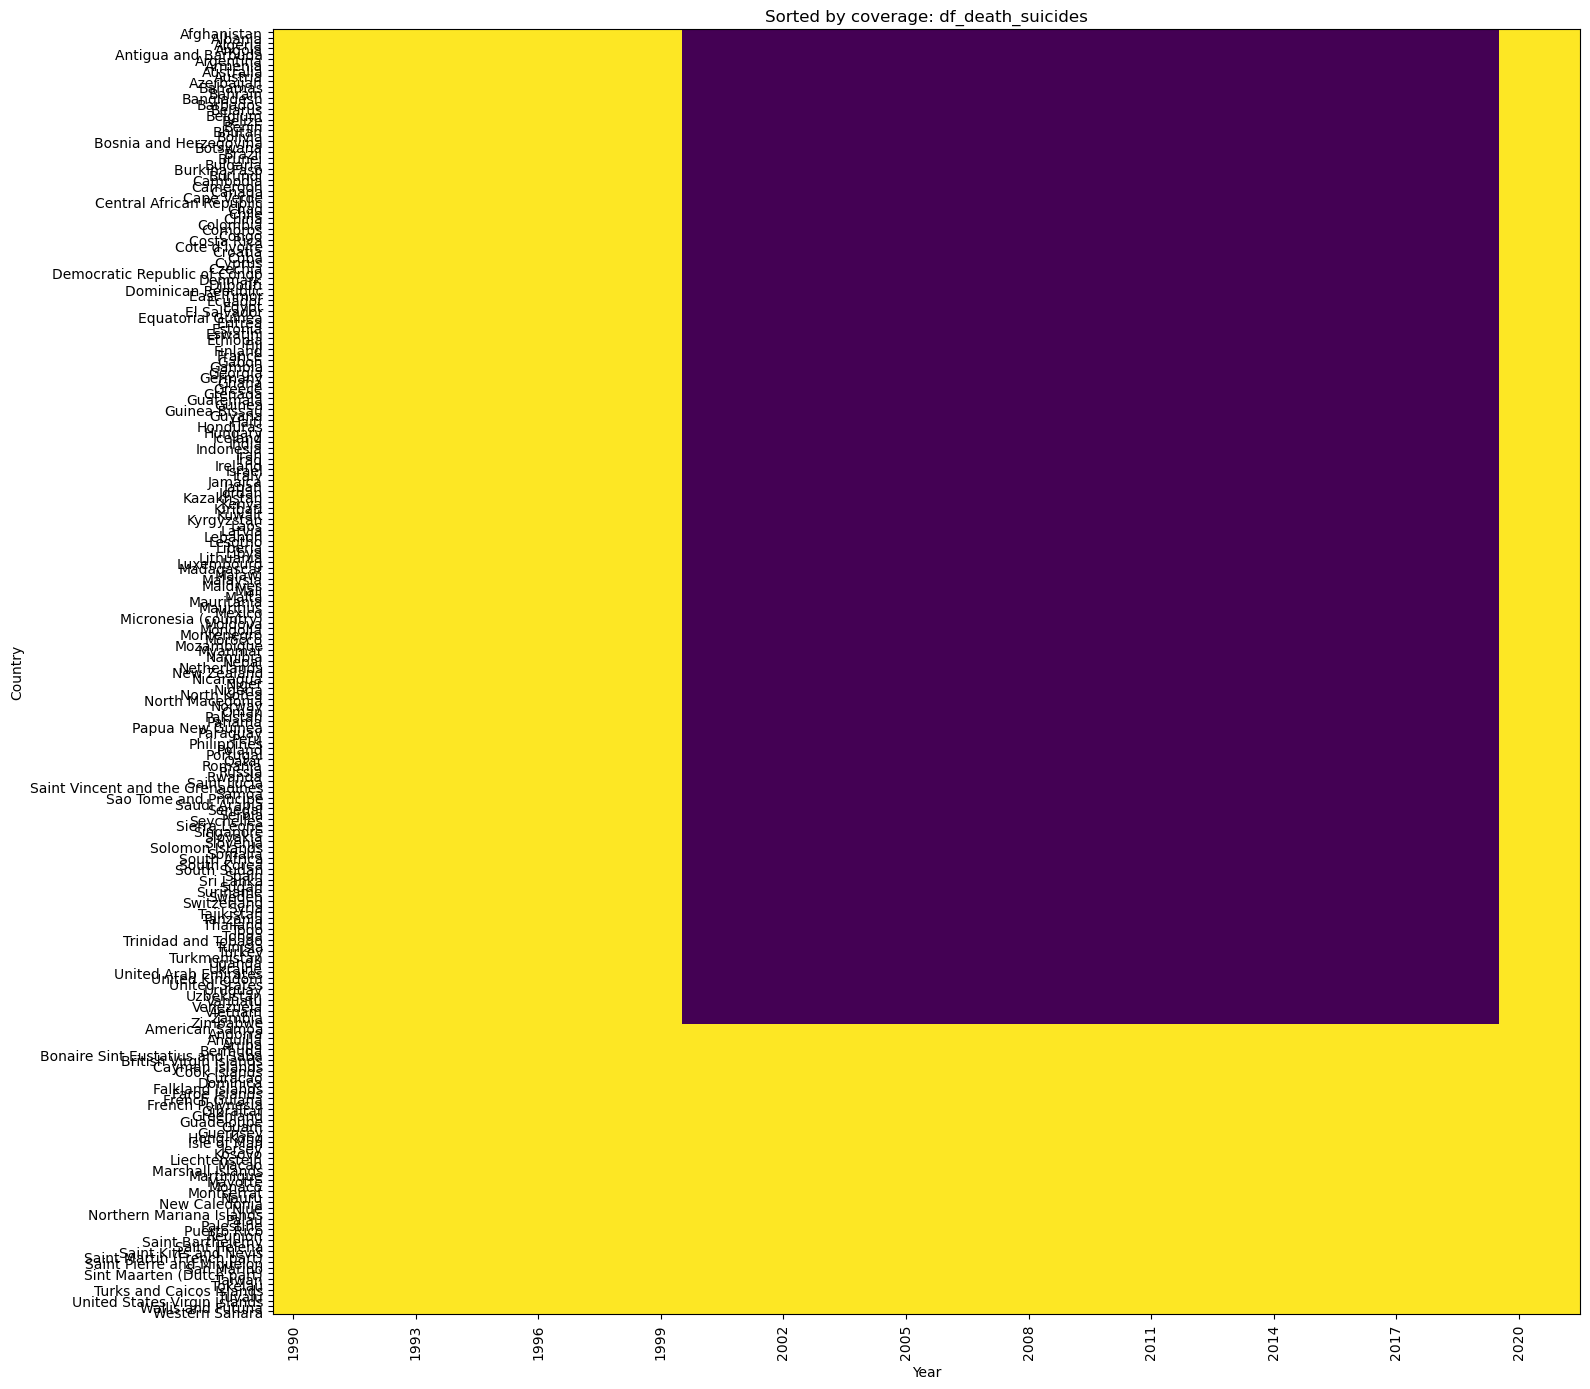

In [122]:
summary, missing_years, missing_matrix = fns.coverage_report(df_death_suicides, countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: df_death_suicides")

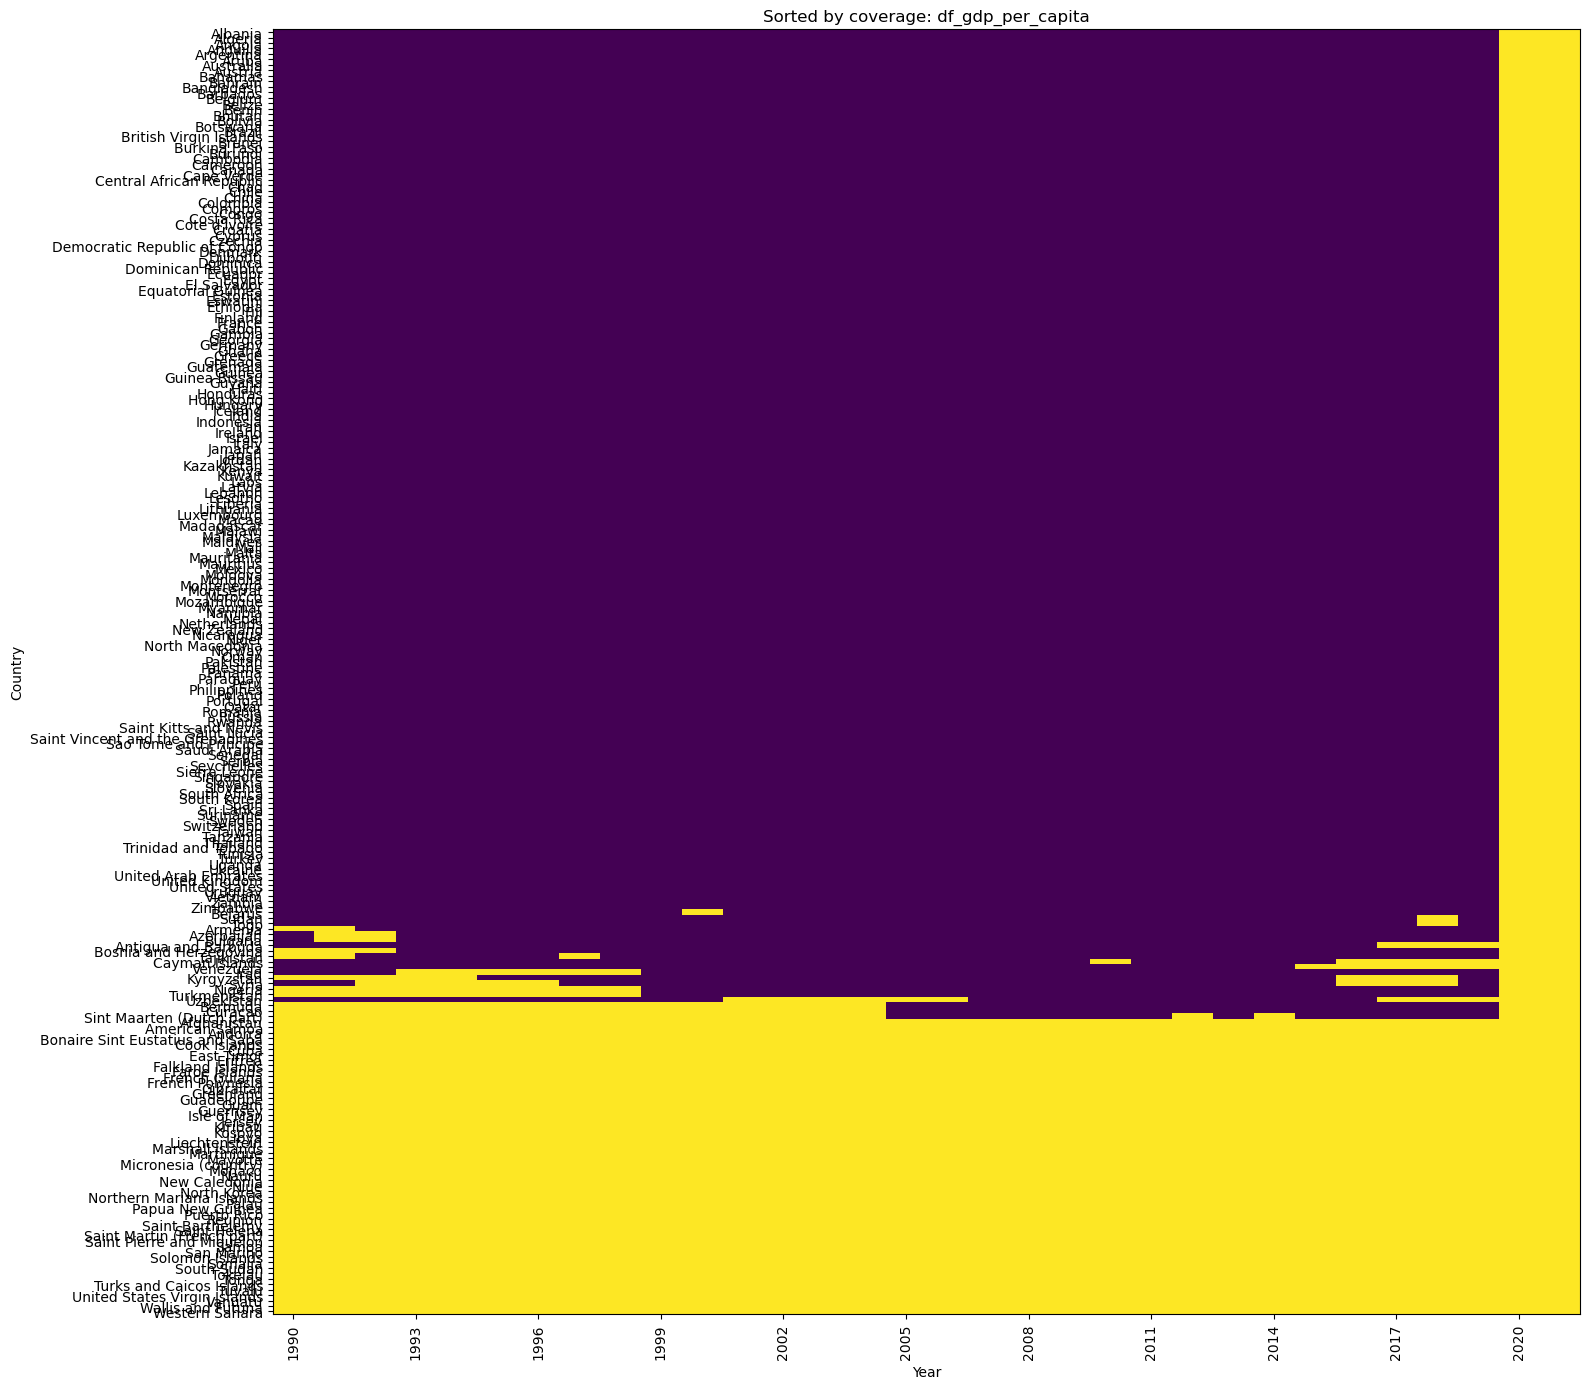

In [128]:
summary, missing_years, missing_matrix = fns.coverage_report(df_gdp_per_capita, countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: df_gdp_per_capita")

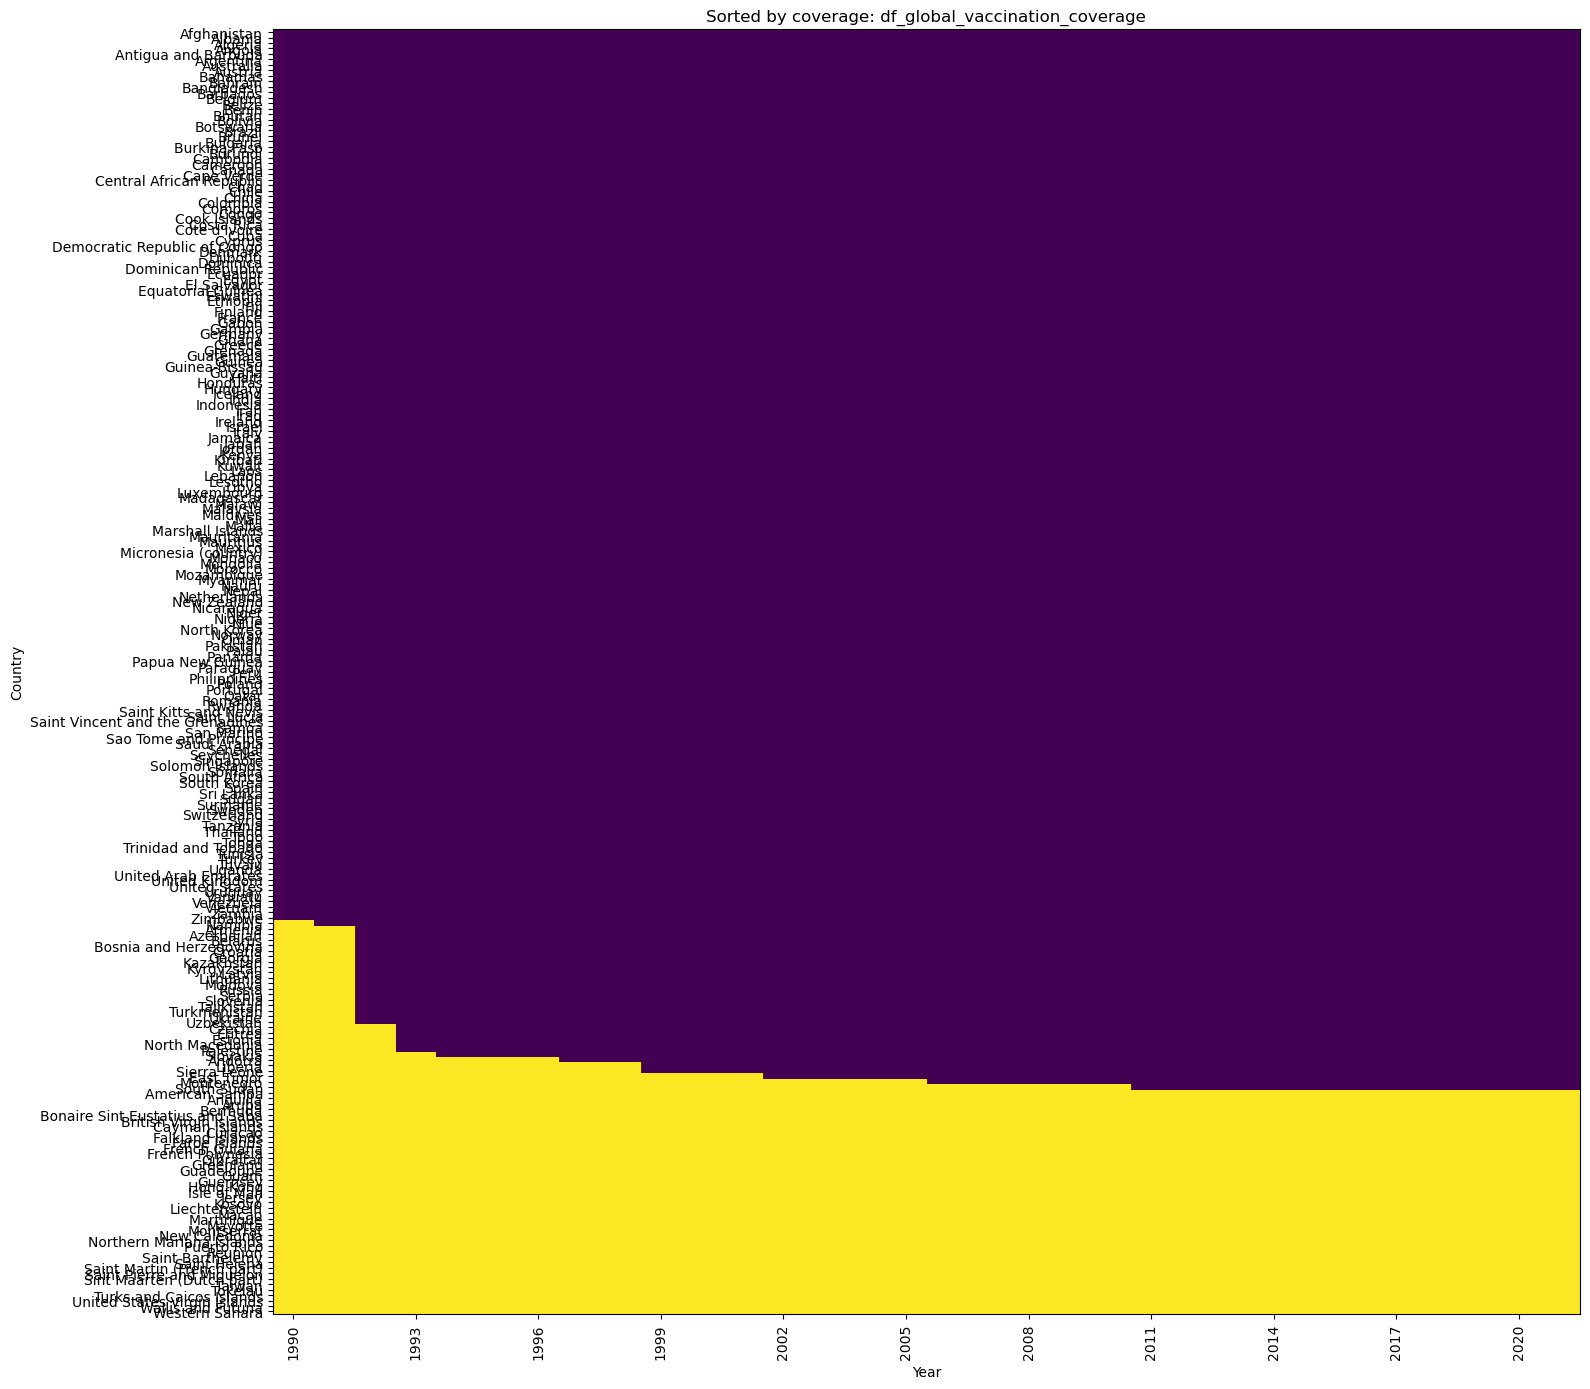

In [127]:
summary, missing_years, missing_matrix = fns.coverage_report(df_global_vaccination_coverage, countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: df_global_vaccination_coverage")

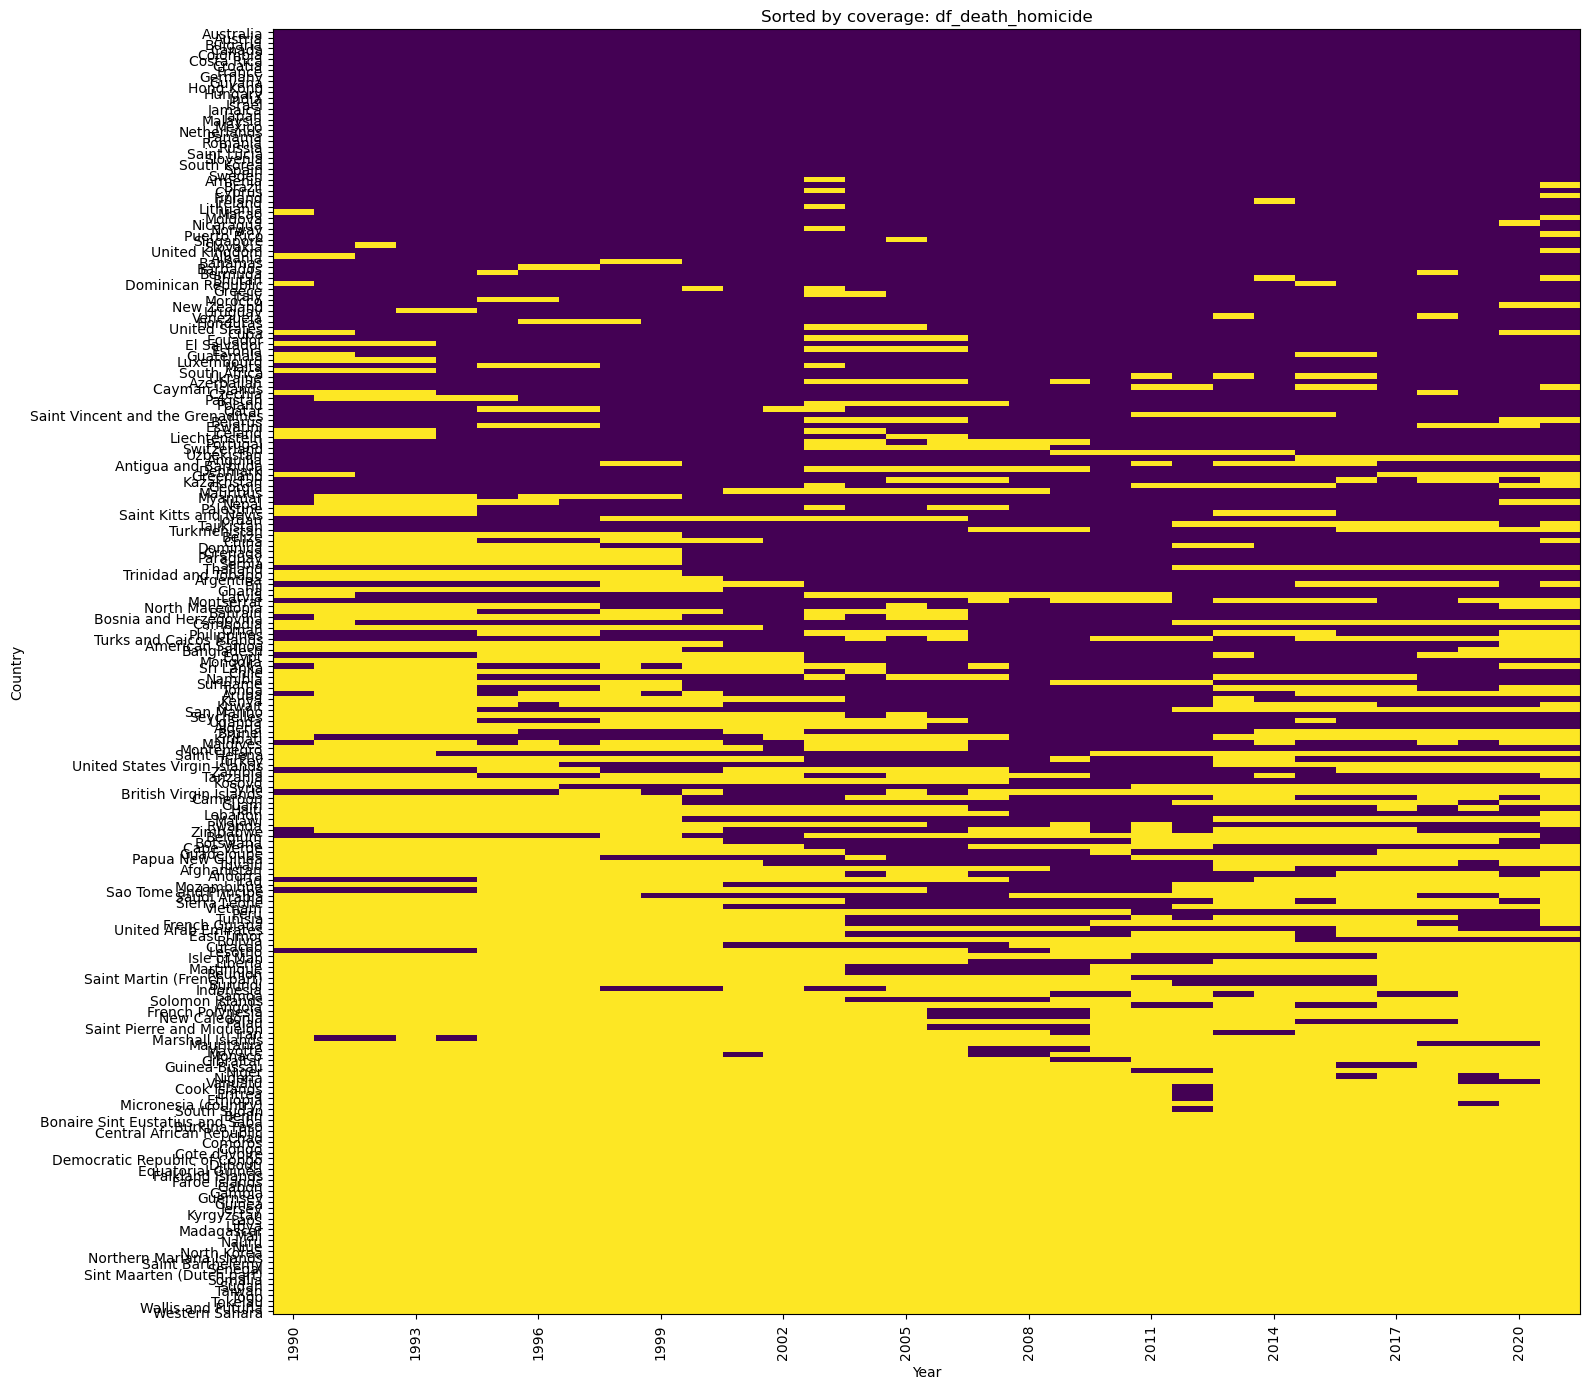

In [126]:
summary, missing_years, missing_matrix = fns.coverage_report(df_death_homicide, countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: df_death_homicide")

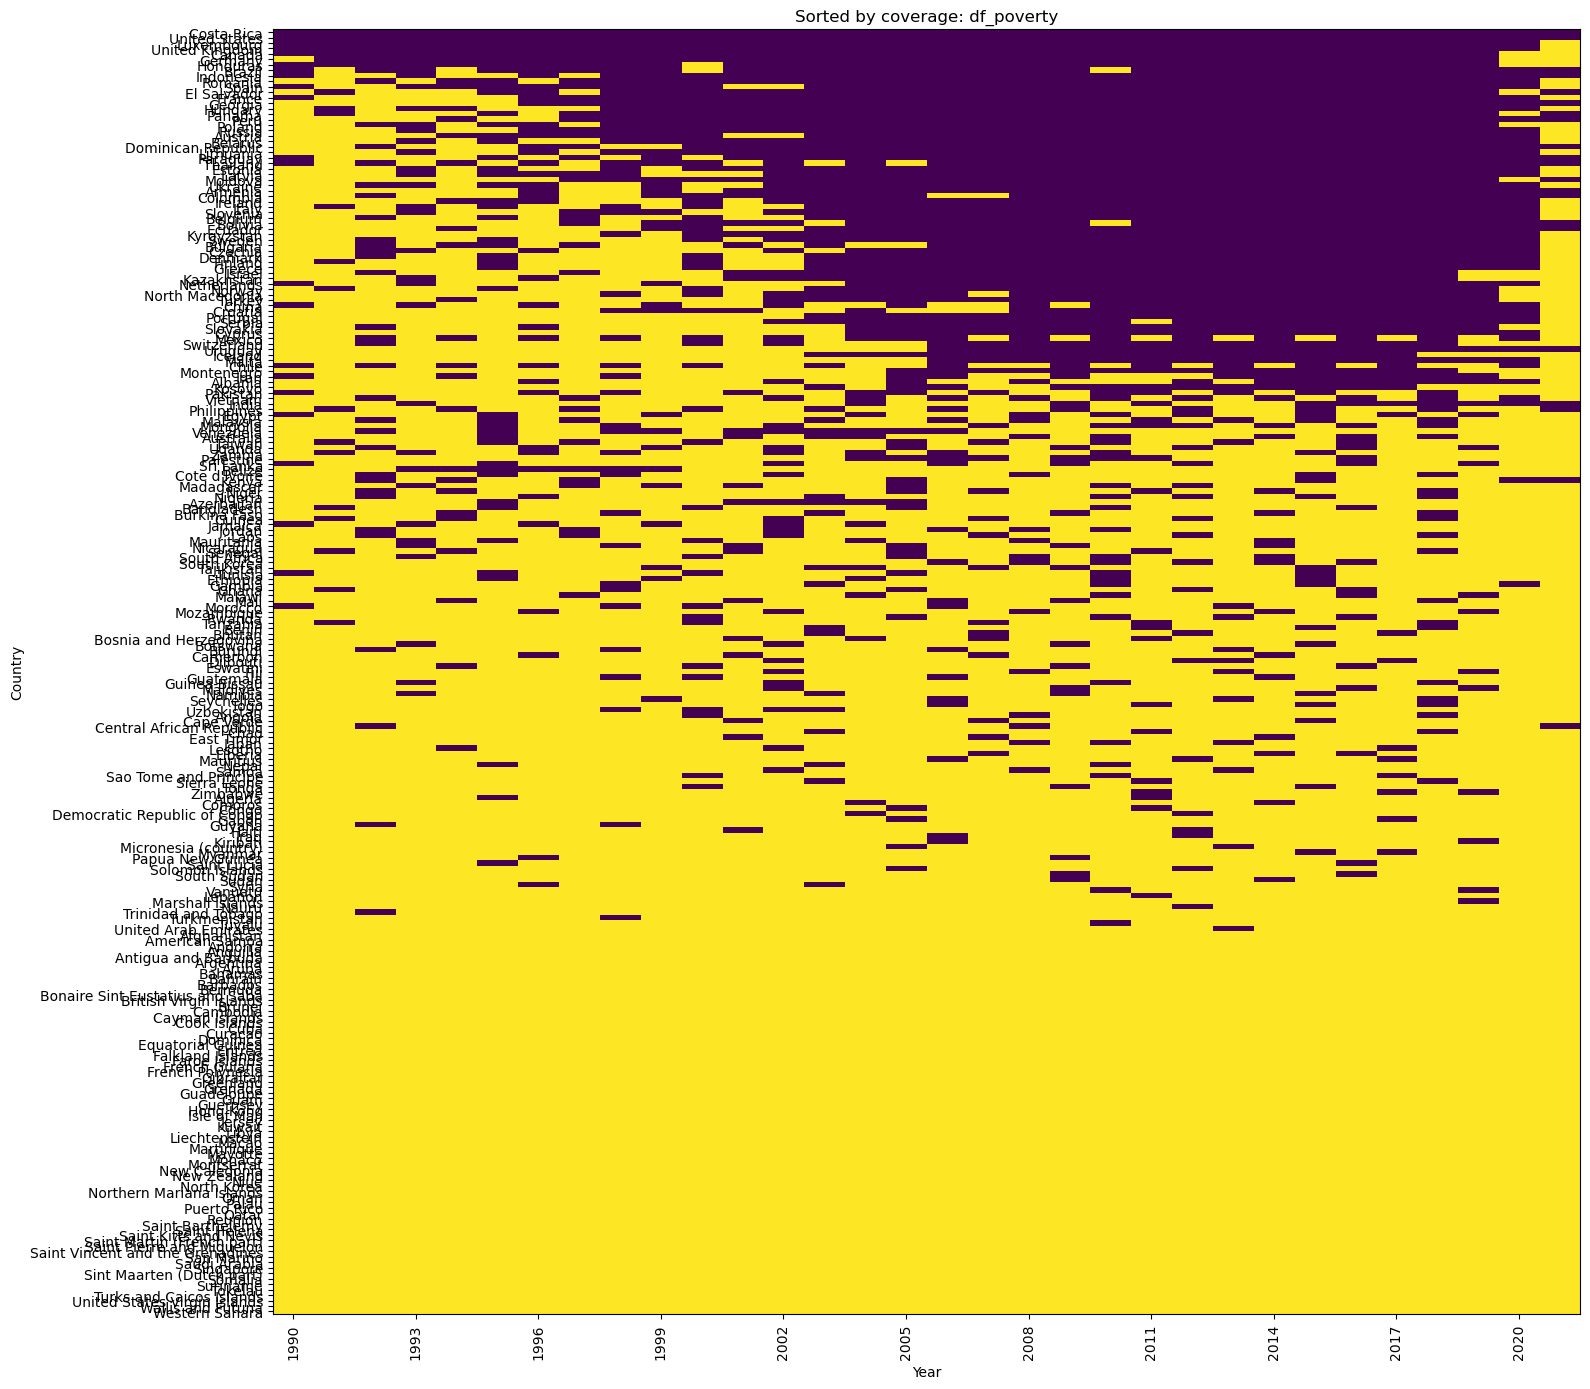

In [125]:
summary, missing_years, missing_matrix = fns.coverage_report(df_poverty, countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: df_poverty")

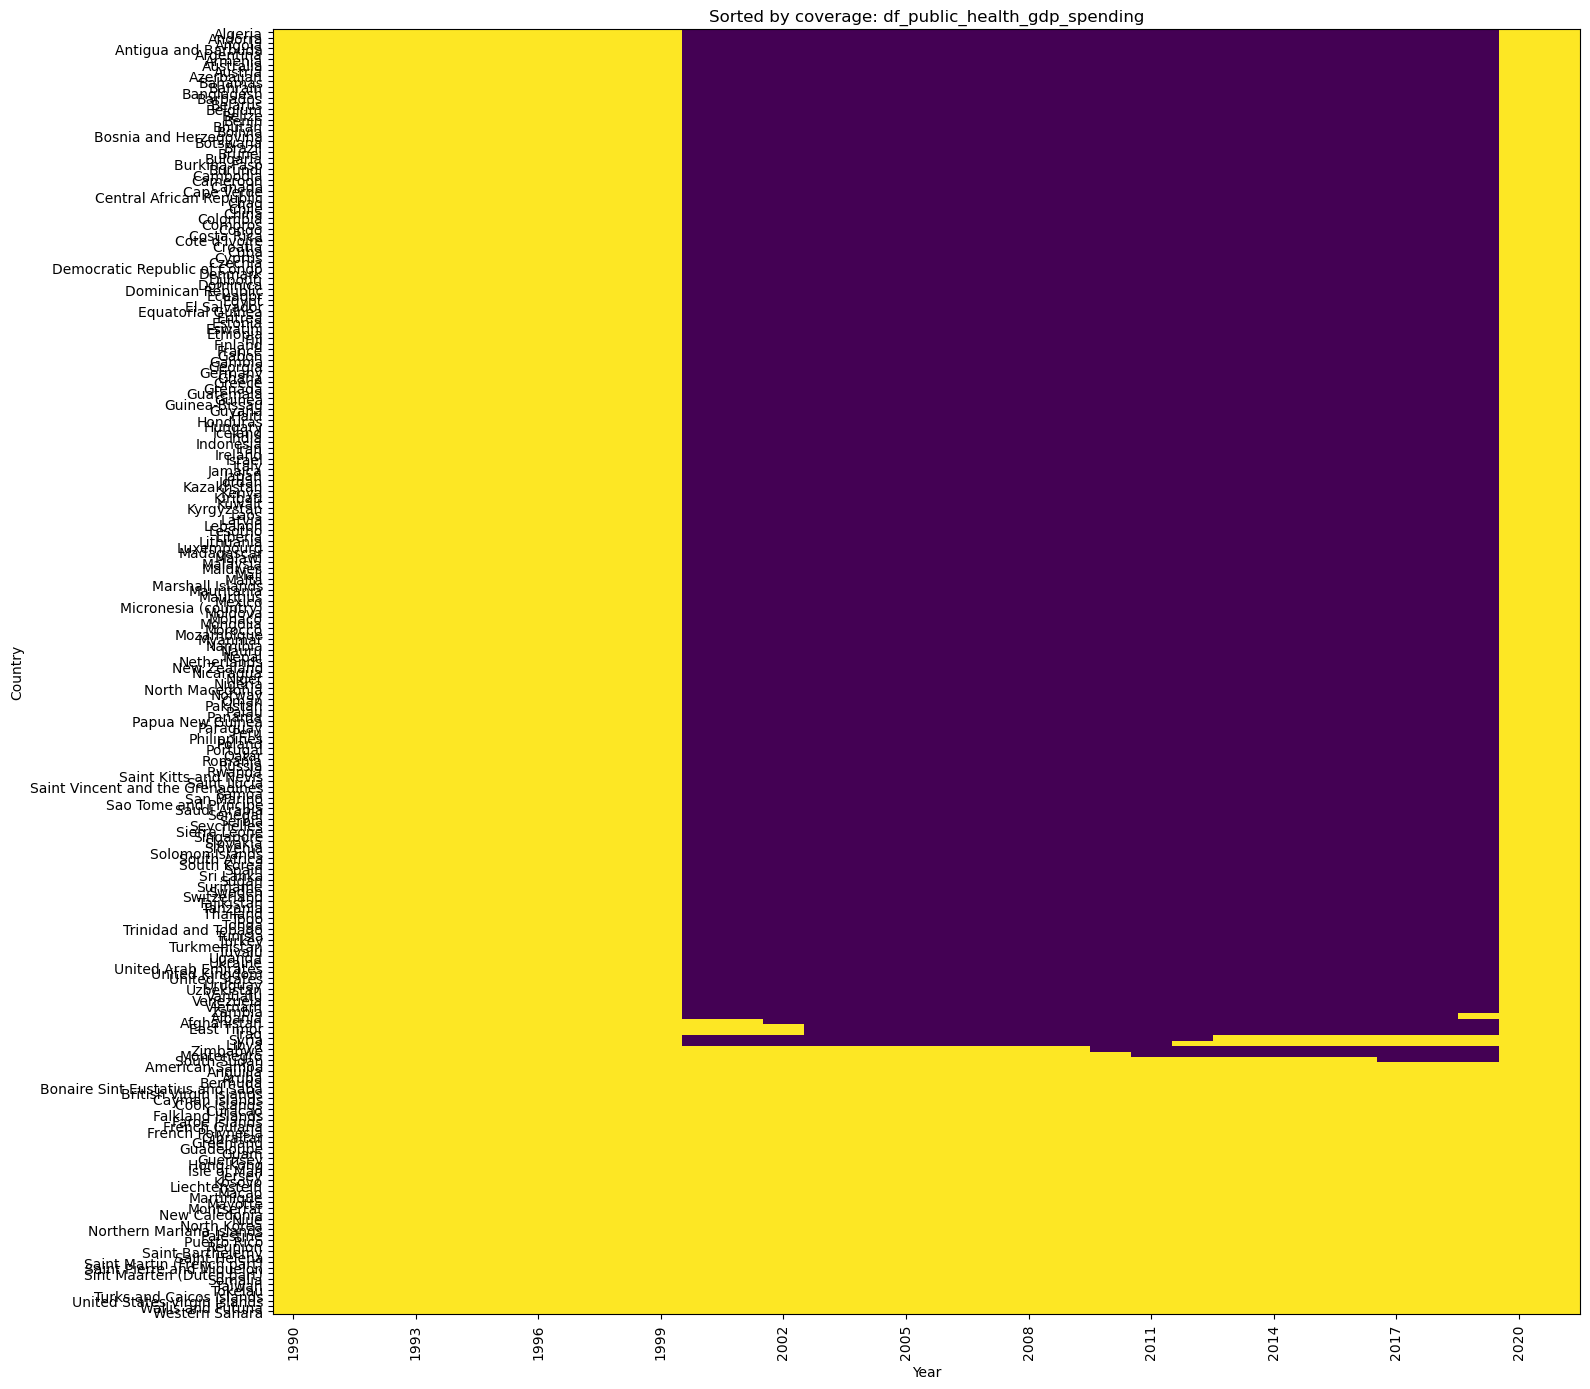

In [124]:
summary, missing_years, missing_matrix = fns.coverage_report(df_public_health_gdp_spending, countries=selected_countries, years=years_selected)
missing_matrix_sorted = missing_matrix.loc[summary.index]
fns.plot_missing_heatmap(missing_matrix_sorted, figsize=(16,14), title="Sorted by coverage: df_public_health_gdp_spending")

### En los heat_map, el color morado represnta que hay datos, y el color amarillo los faltantes.

Se observa que:

- El gran vacio es el dataset de poverty, esto puede deberse a que las encuestas de pobreza no se realizan todos los a;os en todos los paises